In [2]:
%matplotlib inline

In [3]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

In [4]:
from traffic_simulation import *

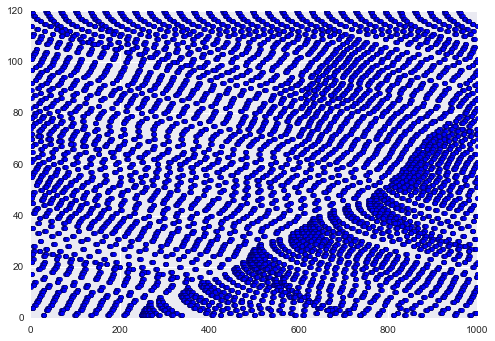

In [5]:
tron.plot_traffic(tron.get_location(33, 120))

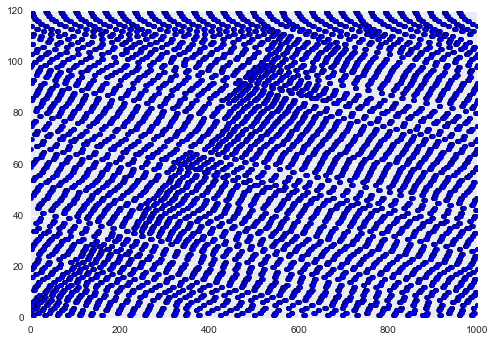

In [6]:
tron.plot_traffic(tron.get_location(30, 120))

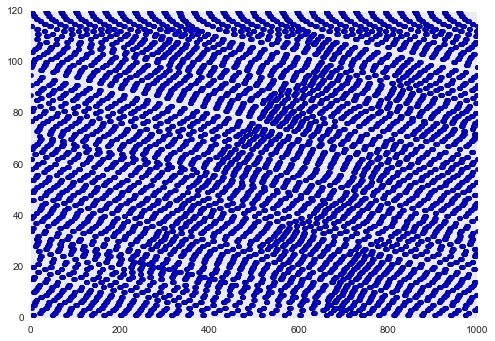

In [7]:
tron.plot_traffic(tron.get_location(27, 120))

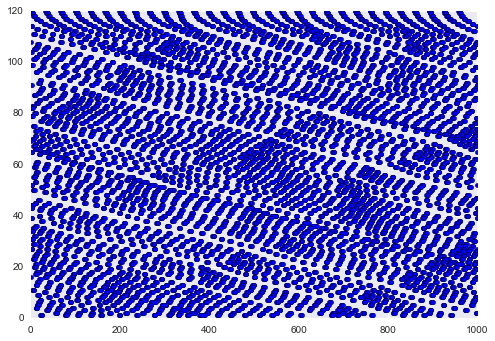

In [8]:
tron.plot_traffic(tron.get_location(25, 120))

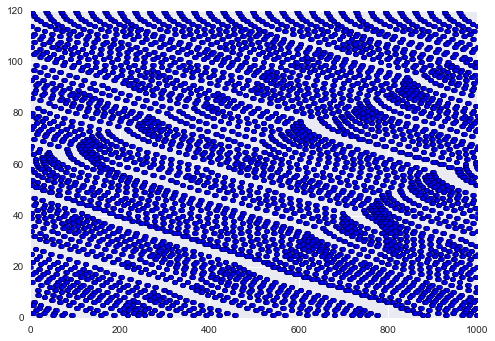

In [9]:
tron.plot_traffic(tron.get_location(20, 120))

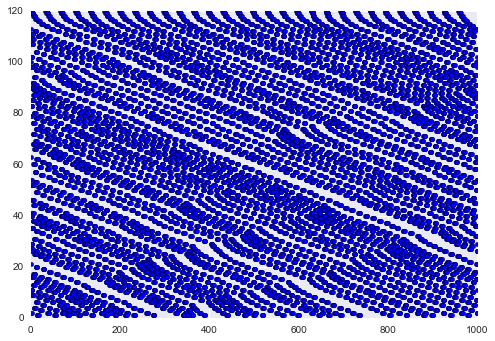

In [10]:
tron.plot_traffic(tron.get_location(15, 120))

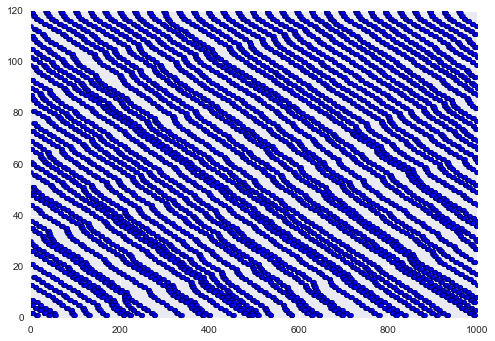

In [11]:
tron.plot_traffic(tron.get_location(10, 120))

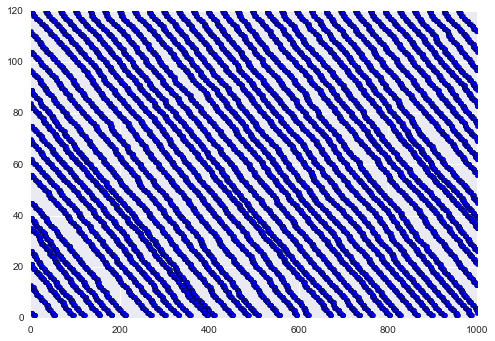

In [12]:
tron.plot_traffic(tron.get_location(5, 120))

In [20]:
tronss = Simulation(range(20,33), 3000, 100)

In [21]:
speeds_list, average_speeds_list = tronss.full_monte()

In [22]:
print(average_speeds_list)

[[16.32, 16.81, 16.6, 16.59, 16.93, 16.47, 16.69, 16.62, 16.71, 16.56, 16.82, 16.53, 16.55, 16.64, 16.52, 16.39, 16.82, 16.61, 16.4, 16.67, 16.67, 16.77, 16.66, 16.54, 16.95, 16.92, 16.51, 17.09, 16.85, 16.56, 16.52, 16.54, 16.46, 16.11, 16.78, 16.59, 16.62, 16.78, 16.51, 16.7, 16.61, 16.91, 16.46, 16.3, 16.36, 16.49, 16.49, 16.55, 16.85, 16.55, 16.69, 16.73, 16.87, 16.56, 16.93, 15.98, 16.56, 16.85, 16.39, 16.97, 16.74, 16.63, 16.66, 16.52, 16.69, 16.65, 16.55, 16.73, 16.7, 16.74, 16.87, 16.59, 16.64, 16.37, 16.21, 16.85, 16.87, 16.69, 16.9, 16.37, 17.15, 16.71, 16.82, 16.77, 16.39, 16.86, 16.62, 16.41, 17.19, 16.21, 17.04, 16.63, 16.79, 16.85, 16.53, 16.5, 16.55, 16.35, 16.87, 16.5], [18.34, 18.78, 18.11, 18.41, 18.27, 18.5, 18.74, 18.63, 18.54, 18.26, 18.63, 18.41, 18.67, 18.65, 18.5, 18.48, 18.34, 18.62, 18.37, 18.64, 18.5, 18.62, 18.34, 18.84, 17.97, 18.64, 18.73, 18.17, 18.39, 17.82, 18.11, 18.44, 18.28, 18.67, 18.52, 18.04, 18.36, 18.14, 18.69, 18.76, 18.64, 19.05, 18.53, 18.47,

In [23]:
avg_speeds_by_max_speed = []
for i, speed in enumerate(average_speeds_list):
    avg_speed = i + 20, st.mean(speed), st.stdev(speed)
    print(avg_speed)
    avg_speeds_by_max_speed.append(avg_speed)
    
    

(20, 16.6419, 0.2149216206674029)
(21, 18.4911, 0.22287784850346928)
(22, 18.486, 0.2289545850604483)
(23, 20.3678, 0.2648825926307501)
(24, 20.3501, 0.25023017686550403)
(25, 22.1802, 0.2598328133802406)
(26, 22.157899999999998, 0.35609071310495577)
(27, 24.0694, 0.31797598537110844)
(28, 24.0652, 0.3748548001721749)
(29, 25.925900000000002, 0.3929558923509525)
(30, 25.8999, 0.4088181908028471)
(31, 27.844299999999997, 0.393061680717524)
(32, 27.825300000000002, 0.4177657141499191)


In [24]:
print(avg_speeds_by_max_speed)

[(20, 16.6419, 0.2149216206674029), (21, 18.4911, 0.22287784850346928), (22, 18.486, 0.2289545850604483), (23, 20.3678, 0.2648825926307501), (24, 20.3501, 0.25023017686550403), (25, 22.1802, 0.2598328133802406), (26, 22.157899999999998, 0.35609071310495577), (27, 24.0694, 0.31797598537110844), (28, 24.0652, 0.3748548001721749), (29, 25.925900000000002, 0.3929558923509525), (30, 25.8999, 0.4088181908028471), (31, 27.844299999999997, 0.393061680717524), (32, 27.825300000000002, 0.4177657141499191)]
